In [1]:
# import modules
import requests
import shutil
from IPython.display import Image
from IPython.core.display import HTML 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load IMDB 5000 data
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# encode genre as list and grab genres
genres = set()
genre_list = []
for i in xrange(len(df["genres"])):
    movie_genres = df["genres"].ix[i,].split("|")
    genre_list.append(movie_genres)
    for genre in movie_genres:
        genres.add(genre)
df["genres"] = genre_list
genres = sorted(list(genres))

# check correctness
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,"[Action, Adventure, Fantasy]",...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,"[Action, Adventure, Thriller]",...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,"[Action, Thriller]",...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,[Documentary],...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
list(df.columns)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [5]:
genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

### By Country

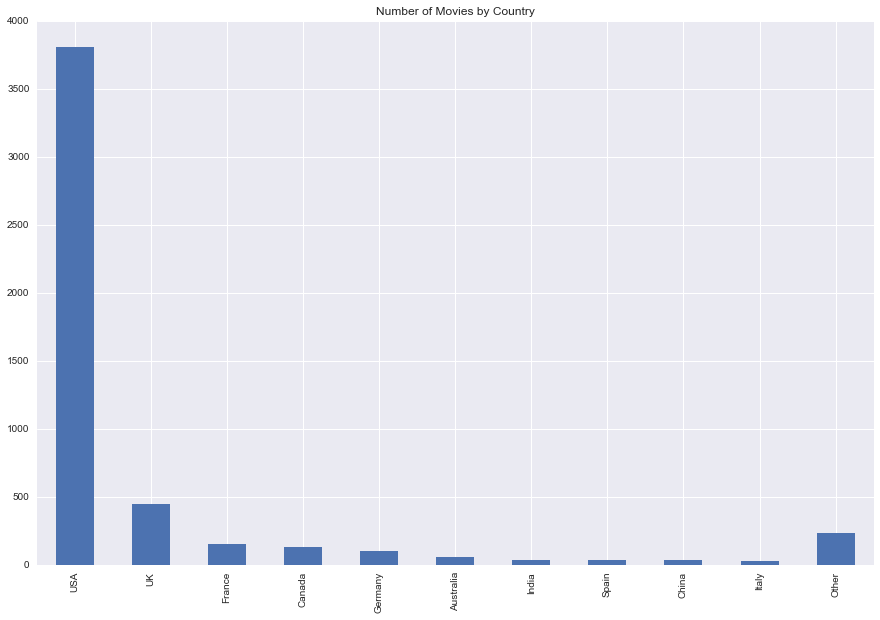

In [6]:
# grab country names
countries = df["country"].unique()
# remove NaN
countries = np.delete(countries, 2)

country_count = df.groupby('country').count()["movie_title"].sort_values(ascending=False)
country_count_top = country_count[0:10]
country_count_top = country_count_top.append(pd.Series(country_count.sum() - country_count_top.sum(), index=["Other"]))
country_count_top.plot(kind='bar',
                      title = "Number of Movies by Country",
                      figsize=(15,10))

Here we see that the vast majority of films come from the USA. 

In [7]:
df_genre_country = pd.DataFrame()

for country in countries:
    country_movies = df[df["country"] == country]
    genre_count = [0] * len(genres)
    for _, movie in country_movies.iterrows():
        genre_for_movie = movie["genres"]
        for genre in genre_for_movie:
            genre_count[genres.index(genre)] += 1
    df_genre_country[country] = genre_count
    
df_genre_country["Genre"] = genres
df_genre_country.set_index("Genre", inplace = True)
df_genre_country

,USA,UK,New Zealand,Canada,Australia,Belgium,Japan,Germany,China,France,...,Kyrgyzstan,Indonesia,Pakistan,Slovenia,Afghanistan,Dominican Republic,Cameroon,United Arab Emirates,Kenya,Philippines
Genre,,,,,,,,,,,,,,,,,,,,,
Action,861,91,6,26,16,2,12,26,18,31,...,1,1,0,0,0,0,0,0,0,0
Adventure,685,98,7,13,16,3,14,16,12,20,...,0,0,0,0,0,0,0,0,0,0
Animation,182,12,0,3,2,1,10,4,2,12,...,0,0,0,0,0,0,0,0,0,0
Biography,179,57,3,6,5,1,0,9,1,13,...,1,0,0,0,0,0,0,0,0,0
Comedy,1529,128,1,41,16,1,4,32,6,41,...,0,0,1,1,0,0,0,0,0,0
Crime,672,77,2,18,4,0,1,29,2,39,...,0,1,0,0,0,1,0,0,0,0
Documentary,90,11,1,2,1,0,0,2,0,4,...,0,0,0,0,0,0,1,1,0,0
Drama,1852,265,12,65,28,1,8,54,18,98,...,1,0,0,0,1,1,0,0,1,0
Family,436,38,1,11,8,1,7,12,2,12,...,0,0,1,0,0,0,0,1,0,0


In [18]:
def proportionize(series):
    answer = []
    for item in series:
        answer.append(float(item) / float(series.sum()))
    return pd.Series(answer)

df_genre_country_prop = df_genre_country.apply(proportionize)
df_genre_country_prop["Genre"] = genres
df_genre_country_prop.set_index("Genre", inplace = True)

In [9]:
df_genre_country_prop = pd.melt(df_genre_country_prop, id_vars=['Genre'], value_vars=list(countries))
df_genre_country_prop.to_csv("data/genre_country_prop.csv")

In [19]:
df_genre_country_prop.set_index("Genre", inplace = True)
df_genre_country_prop

KeyError: 'Genre'

## Genre and Quality

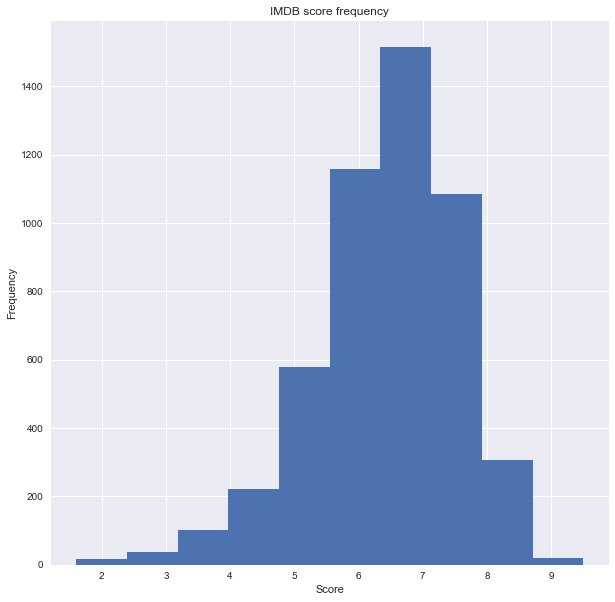

In [11]:
df["imdb_score"].hist(figsize=(10,10))
plt.title('IMDB score frequency')
plt.xlabel('Score')
plt.ylabel('Frequency')

Here, we see that the distribution of IMDB scores are left skewed. 